In [142]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

In [143]:
import math

class ImagePlot:
    def __init__(self, max_columns=5):
        self.reset()
        self.max_columns = max_columns

    def reset(self):
        self.images = []

    def add(self, image, title=""):
        self.images.append({
            "image": image,
            "title": title
        })

    def show(self):
        n_rows = math.ceil(len(self.images) / self.max_columns)
        n_cols = self.max_columns

        plt.figure(figsize=(25, 7))
        for i in range(len(self.images)):
            plt.subplot(n_rows, n_cols, i+1)
            plt.imshow(self.images[i]["image"], cmap="gray")
            plt.title(self.images[i]["title"])
            plt.axis("off")

        plt.show()

plotter = ImagePlot()

In [144]:
X = data.coins()
m, n = X.shape

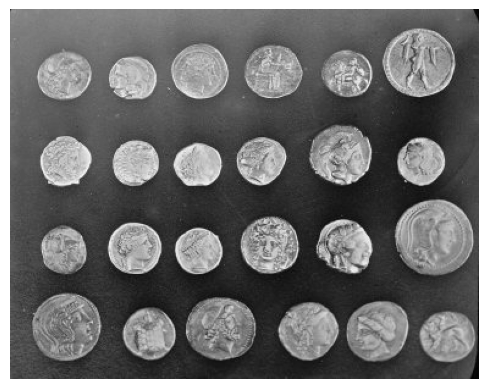

In [145]:
plt.imshow(X, cmap="gray")
plt.axis("off")
plt.show()

In [146]:
U, s, Vh = np.linalg.svd(X)
S = np.zeros(X.shape)
S[:len(s), :len(s)] = np.diag(s)

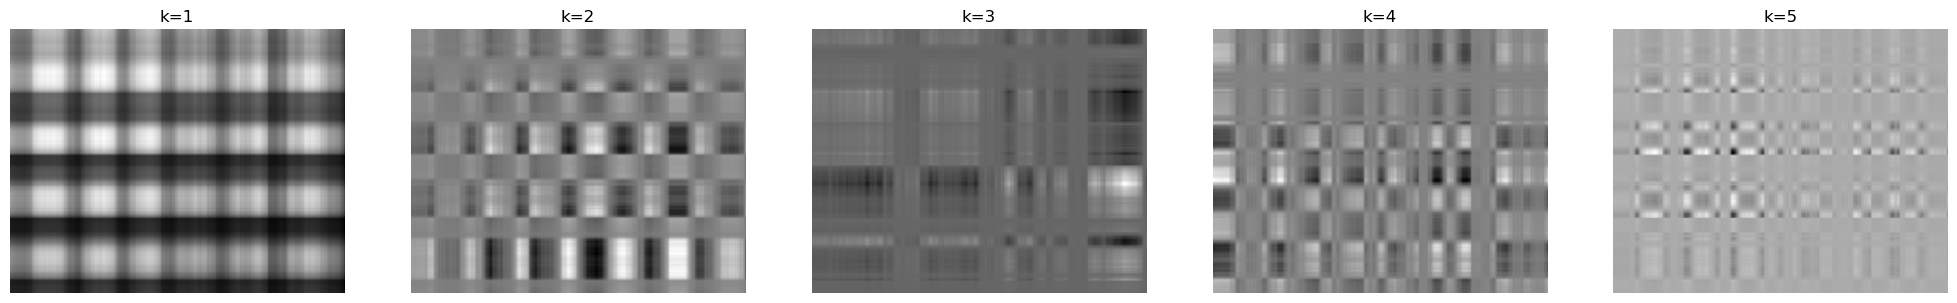

In [147]:
plotter.reset()

for k in range(1, 6):
    i = k - 1
    ui = U[:, i]
    vi = Vh[i, :]
    X_k = s[i] * np.outer(ui, vi)

    plotter.add(X_k, f"k={k}")

plotter.show()

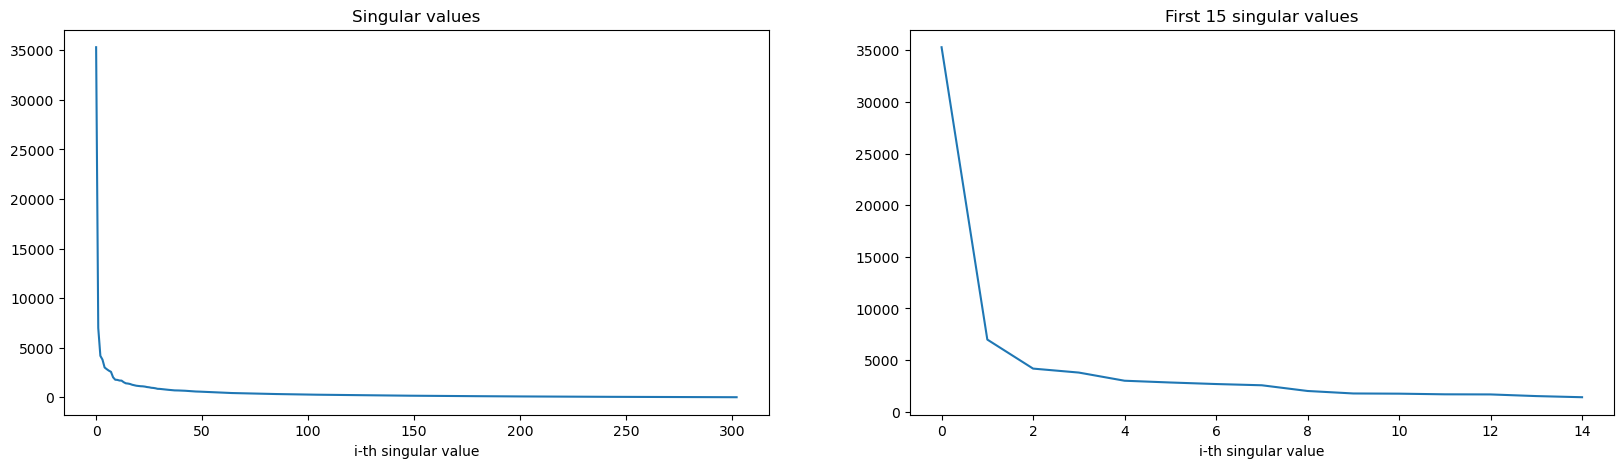

In [148]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot([i for i in range(len(s))], s)
plt.title("Singular values")
plt.xlabel("i-th singular value")

plt.subplot(1, 2, 2)
plt.plot([i for i in range(len(s[:15]))], s[:15])
plt.title("First 15 singular values")
plt.xlabel("i-th singular value")

plt.show()

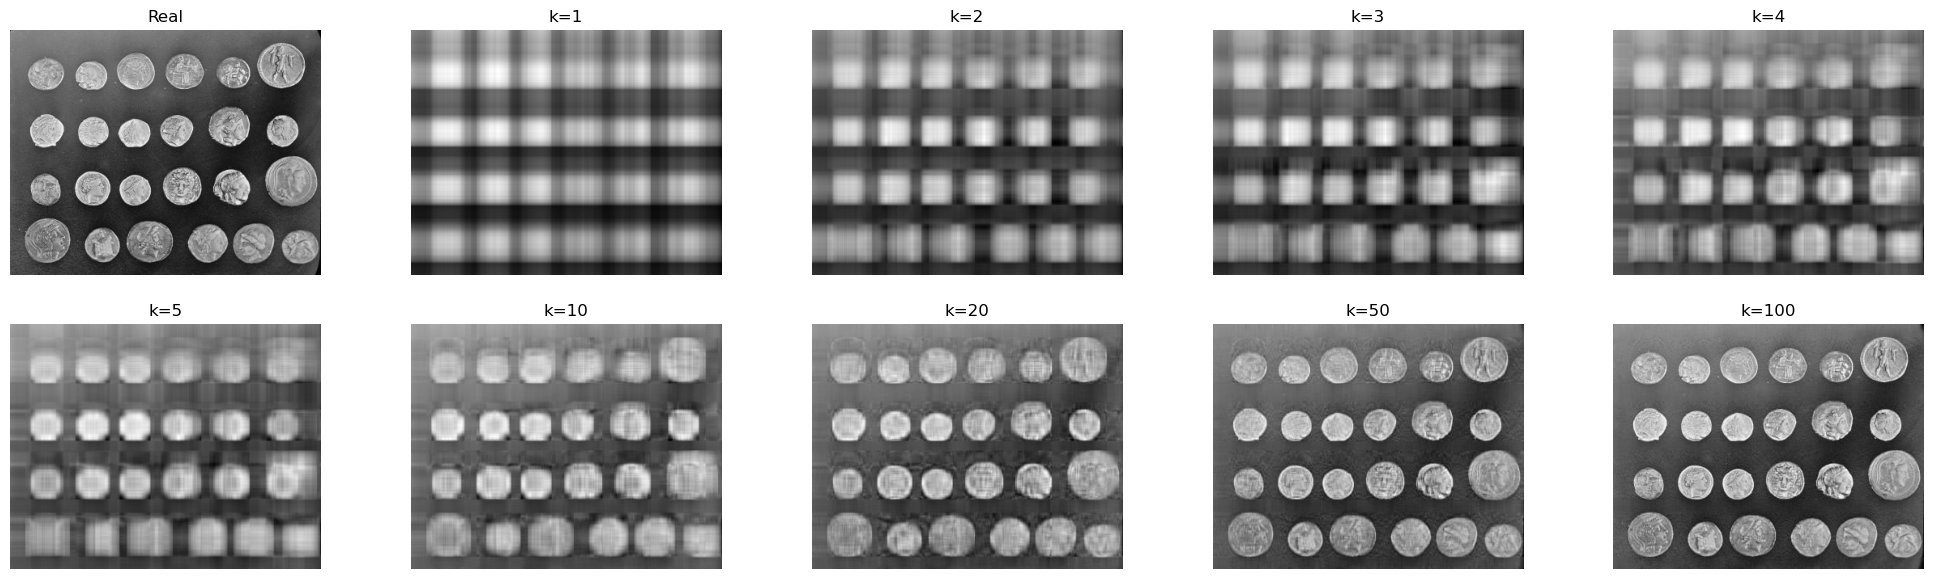

In [149]:
plotter.reset()

plotter.add(X, title="Real")
for k in [1, 2, 3, 4, 5, 10, 20, 50, 100]:
    X_k_approx = U[:, :k] @ S[:k, :k] @ Vh[:k, :]
    plotter.add(X_k_approx, title=f"k={k}")

plotter.show()

Error when c_k~1: 733.1189009399833


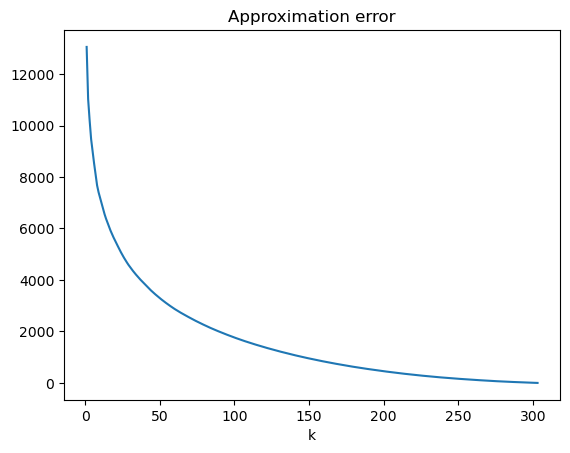

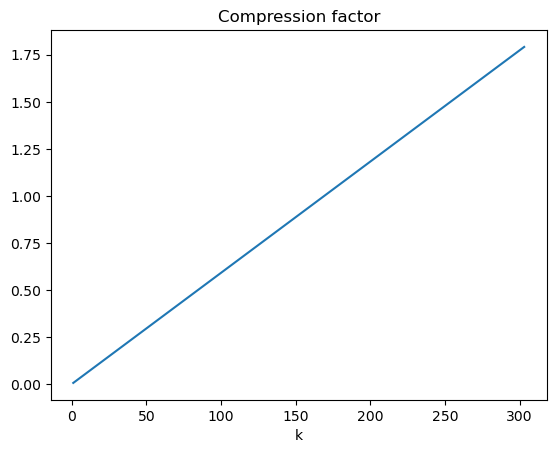

In [150]:
approx_errors = []
compression_factors = []
to_try_k = range(1, np.linalg.matrix_rank(X)+1)

for k in to_try_k:
    X_k_approx = U[:, :k] @ S[:k, :k] @ Vh[:k, :]

    approx_errors.append(np.linalg.norm(X - X_k_approx, "fro"))
    compression_factors.append((k*(m + n + 1)) / (m*n))

    if np.around(compression_factors[-1], 2) == 1:
        print(f"Error when c_k~1: {approx_errors[-1]}")

plt.plot(to_try_k, approx_errors)
plt.title("Approximation error")
plt.xlabel("k")
plt.show()

plt.plot(to_try_k, compression_factors)
plt.title("Compression factor")
plt.xlabel("k")
plt.show()